# Enrichment analysis and visualisations

This is loosely adapted from one of the InterMineR vignettes
https://bioconductor.org/packages/release/bioc/vignettes/InterMineR/inst/doc/Enrichment_Analysis_and_Visualization.html

## Background

The InterMine gene set enrichment tool looks for annotations to a set of genes that occur more than would be expected by chance, given a background population of annotations. The hypergeometric distribution is used to calculate a P-value for each annotation and a choice of correction methods for multiple testing (Bonferonni, Holm-Bonferonni and Benjamini Hochberg) are available (Smith et al. 2012; Kalderimis et al. 2014).

InterMine provides Gene Ontology enrichment statistics as well as enrichment statistics for other annotation types including protein domains, pathways, human diseases, mammalian phenotypes and publications. The default background population is all genes in the genome with the specified annotation type. However, the background population can be changed by specifying another list. More information can be found in the [online documentation](http://intermine.readthedocs.io/en/latest/embedding/list-widgets/enrichment-widgets/).

## Goal for this exercise

1. Use InterMine's enrichment widgets on the HumanMine public list [PL_GenomicsEngland_GenePanel%:Genetic_Epilepsy_Syndromes](http://www.humanmine.org/humanmine/bagDetails.do?scope=all&bagName=PL_GenomicsEngland_GenePanel%3AGenetic_Epilepsy_Syndromes) to see if the list is enriched for any GO Terms.
2. Visualise the results using the GeneAnswers class. 

### Setup
Let's start by initialising InterMineR and choosing which InterMine we'll be running queries against:

In [1]:
# Begin by activating the InterMineR library
# Syntax: library(LIBRARY_NAME_HERE)


We want to query human data - so let's look and see what InterMines are available, using the `listMines()` function: 

BMAP 
               "https://bmap.jgi.doe.gov/bmapmine/" 
                                           BeanMine 
            "https://mines.legumeinfo.org/beanmine" 
                                         BovineMine 
           "http://genomes.missouri.edu/bovinemine" 
                                            CHOmine 
               "https://chomine.boku.ac.at/chomine" 
                                       ChickpeaMine 
        "https://mines.legumeinfo.org/chickpeamine" 
                                         CowpeaMine 
          "https://mines.legumeinfo.org/cowpeamine" 
                                            FlyMine 
                   "http://www.flymine.org/flymine" 
                                          GrapeMine 
         "http://urgi.versailles.inra.fr/GrapeMine" 
                                          HumanMine 
               "http://www.humanmine.org/humanmine" 
                                    HymenopteraMine 
     "http://hymenopteragenome.org/hymenopteramine" 
                                         IndigoMine 
              "http://www.cbrc.kaust.edu.sa/indigo" 
                                         LegumeMine 
          "https://mines.legumeinfo.org/legumemine" 
                                          MaizeMine 
"http://maizemine.rnet.missouri.edu:8080/maizemine" 
                                          MedicMine 
              "http://medicmine.jcvi.org/medicmine" 
                                          MitoMiner 
   "http://mitominer.mrc-mbu.cam.ac.uk/release-4.0" 
                                            ModMine 
        "http://intermine.modencode.org/release-33" 
                                          MouseMine 
               "http://www.mousemine.org/mousemine" 
                                            OakMine 
     "https://urgi.versailles.inra.fr/OakMine_PM1N" 
                                         PeanutMine 
          "https://mines.legumeinfo.org/peanutmine" 
                                          PhytoMine 
         "https://phytozome.jgi.doe.gov/phytomine/" 
                                           PlanMine 
              "http://planmine.mpi-cbg.de/planmine" 
                                            RatMine 
                   "http://ratmine.mcw.edu/ratmine" 
                                            RepetDB 
           "http://urgi.versailles.inra.fr/repetdb" 
                                            SoyMine 
             "https://mines.legumeinfo.org/soymine" 
                                         TargetMine 
   "https://targetmine.mizuguchilab.org/targetmine" 
                                          ThaleMine 
               "https://apps.araport.org/thalemine" 
                                          WheatMine 
        "https://urgi.versailles.inra.fr/WheatMine" 
                                           WormMine 
    "http://intermine.wormbase.org/tools/wormmine/" 
                                            XenMine 
                   "http://www.xenmine.org/xenmine" 
                                          YeastMine 
      "https://yeastmine.yeastgenome.org/yeastmine" 
                                      ZebrafishMine 
                         "http://zebrafishmine.org"

Okay, let's select HumanMine from this list, and store it in a variable called `humanMine`:

In [3]:
# Syntax: listMines()["MINE _NAME_HERE"] 

# Print the value to make sure it's what we expect


HumanMine 
"http://www.humanmine.org/humanmine"

And now we need to tell InterMineR to query HumanMine specifically, using the function `initInterMine()`. Let's store this in a variable called `im`.

In [1]:
# Syntax: initInterMine(mine=MINE_URL_HERE) or, if you're accessing a personal list, you'll also need your API token: 
#         initInterMine(mine=MINE_URL_HERE, "YOUR_TOKEN_HERE")



## Getting started with Enrichment

Performing enrichment analysis with InterMineR is preceded by two steps:

1. Get the enrichment widget name which indicates the annotation types that you want to investigate for enrichment (e.g. Gene Ontology Terms, protein domains, KEGG and Reactome Pathways, human diseases, mammalian phenotypes and publications).
2. Retrieve the list of bioentities of interest (Genes, Proteins, SNPs, etc.) for which the analysis will be performed.

In [5]:
# First, we'll retrieve the widgets available from HumanMine and store it in a variable called `humanWidgets`. 
# This will tell us what types of enrichment are available.
# 
# Syntax: getWidgets(im)


# Print out the widgets so we can see what there is

humanWidgets


startClassDisplay,enrichIdentifier,name,description,enrich,startClass,title,targets,widgetType,chartType,filters,labels
primaryIdentifier,GWASResults.study.publication.pubMedId,snp_gwas_study_enrichment,GWAS studies enriched for SNPs in this list.,GWASResults.study.name,SNP,GWAS study Enrichment for SNPs,SNP,enrichment,NA,NA,NA
NA,NA,chromosome_distribution_for_snp,"Actual: number of items in this list found on each chromosome. Expected: given the total number of items on the chromosome and the number of items in this list, the number of items expected to be found on each chromosome.",NA,SNP,Chromosome Distribution,SNP,chart,ColumnChart,organism.name=[list],Chromosome & Count
primaryIdentifier,goAnnotation.ontologyTerm.parents.identifier,go_enrichment_for_gene,GO terms enriched for items in this list.,goAnnotation.ontologyTerm.parents.name,Gene,Gene Ontology Enrichment,Gene,enrichment,NA,"biological_process,cellular_component,molecular_function",NA
primaryIdentifier,publications.pubMedId,publication_enrichment,Publications enriched for genes in this list.,publications.title,Gene,Publication Enrichment,Gene,enrichment,NA,NA,NA
NA,NA,chromosome_distribution_for_gene,"Actual: number of items in this list found on each chromosome. Expected: given the total number of items on the chromosome and the number of items in this list, the number of items expected to be found on each chromosome.",NA,Gene,Chromosome Distribution,Gene,chart,ColumnChart,organism.name=[list],Chromosome & Count
primaryIdentifier,pathways.identifier,pathway_enrichment,Pathways enriched for genes in this list - data from KEGG and Reactome,pathways.name,Gene,Pathway Enrichment,Gene,enrichment,NA,"All,KEGG pathways data set,Reactome data set",NA
primaryIdentifier,GWASResults.study.publication.pubMedId,snp_publication_enrichment,Publications enriched for SNPs in this list.,GWASResults.study.publication.title,SNP,Publication Enrichment for SNPs,SNP,enrichment,NA,NA,NA
primaryIdentifier,proteins.proteinDomainRegions.proteinDomain.primaryIdentifier,prot_dom_enrichment_for_gene,Protein Domains enriched for items in this list.,proteins.proteinDomainRegions.proteinDomain.name,Gene,Protein Domain Enrichment,Gene,enrichment,NA,NA,NA
primaryIdentifier,proteinDomainRegions.proteinDomain.primaryIdentifier,prot_dom_enrichment_for_protein,Protein Domains enriched for items in this list.,proteinDomainRegions.proteinDomain.name,Protein,Protein Domain Enrichment,Protein,enrichment,NA,NA,NA
NA,NA,interactions,Genes (from the list or not) that interact with genes in this list. Counts may include the same interaction more than once if observed in multiple experiments.,NA,NA,Interactions,Gene,table,NA,NA,NA


Take a look through the widgets returned, especially the columns `targets` and `widgetType`. Since we plan to enrich the gene list `PL_GenomicsEngland_GenePanel:Genetic_Epilepsy_Syndromes`, we're only interested in widgets that target `Gene`s. Similarly, we don't need to look at any widgets that aren't `enrichment` type widgets.

In [2]:
# We'll put the widget list `humanWidgets` in to a data frame, so it's easy to filter.
#
# Syntax: as.data.frame(LIST_NAME_HERE)

humanWidgetsDataFrame <- #put data frame code here

ERROR: Error in parse(text = x, srcfile = src): <text>:6:0: unexpected end of input
4: 
5: humanWidgetsDataFrame <- #put data frame code here
  ^


Now let's ask the data frame to give us a subset of the widgets.  
We want the following filters: 
- `widgetType` should be `'enrichment'`
- `targets` should be `Gene`

In [ ]:
# Syntax: subset(YOU_DATA_FRAME, COLUMN1 == 'VALUE1' & COLUMN2 == 'VALUE2' )


#### Syntax Note: `=` vs `==`
##### Assignment operator: `=` or `<-`
In the code example above, we use the double equals sign `==`. This is because a single equals sign is used for *assignment*, e.g. `kittens = 5`, which would assign the value 5 to the variable `kittens`.  

In R we also use `<-` for assignment, so `kittens = 5` and `kittens <- 5` do (basically) the same thing.

##### Comparison operator: `==`
The double equals, however, is used for comparison - when we say `widgetType == 'enrichment'` we're saying that the code should compare all `widgetTypes`, and only give us ones that are equal to `enrichment`. 

### Perform enrichment analysis

Looking at the filtered list of widgets above, it looks like the widget we want to use to check for enriched GO Terms is named `go_enrichment_for_gene`. We'll use the `doEnrichment` method to get the enrichment results from HumanMine. 

In [7]:
# We're using the widget `go_enrichment_for_gene` against the list name 
# `PL_GenomicsEngland_GenePanel:Genetic_Epilepsy_Syndromes`
#
#Syntax: 
#
# GOEnrichmentResult <- doEnrichment(
#   im = YOUR_CHOSEN_INTERMINE_HERE
#   list = LIST_NAME_SAVE_ON_YOUR_CHOSEN_INTERMINE,
#   widget = "go_enrichment_for_gene" #  Or whichever widget you're using
#   organism = "Homo sapiens" # optional if results from more than one organism are retrieved
# )

GOEnrichmentResult <- doEnrichment(
    # Put enrichment details here
)

# Print the results 
GOEnrichmentResult

identifier,description,pValue,count,populationAnnotationCount
<chr>,<chr>,<chr>,<chr>,<chr>
GO:0086010,membrane depolarization during action potential,0.0029933397620292668,3,36
GO:0019226,transmission of nerve impulse,0.012440595908190567,3,72
GO:0051899,membrane depolarization,0.013711012061119023,3,85
GO:0019227,neuronal action potential propagation,0.015706289435420368,2,9
GO:0098870,action potential propagation,0.015706289435420368,2,9
GO:0042391,regulation of membrane potential,0.015721651039763786,4,421
GO:0001508,action potential,0.019257259325613202,3,126
GO:0035725,sodium ion transmembrane transport,0.022633164613943716,3,139
GO:0050877,nervous system process,0.03723962575587324,5,1365


## Visualise it with Gene Answers 

    
For the visualisation, we'll need both the enrichment results and the list of genes we originally enriched - but the list is still on the server. Let's run a query to get the primaryIdentifiers for the genes in `PL_GenomicsEngland_GenePanel:Genetic_Epilepsy_Syndromes`. 

Views to **Select**:  
- `"Gene.primaryIdentifier"`

**Constraints** to set: 
- Path: `"Gene"`
- Operator: `IN`,
- Value: `"PL_GenomicsEngland_GenePanel:Genetic_Epilepsy_Syndromes"`

In [3]:
# We'll be using the setQuery method here
# 
# Syntax: 
# setQuery( 
#  select = c("VIEW.NAME1", "VIEW.NAME2", .... ),
#  where = setConstraints(
#    paths = c("CONSTRAINT.PATH.A", "CONSTRAINT.PATH.B"),
#    operators = c("CONSTRAINT.OPERATOR.A", "CONSTRAINT.OPERATOR.B"),
#    values = list("CONSTRAINT.VALUE.A","CONSTRAINT.VALUE.B")
#  )
#)
queryEpilepsy <- setQuery(
  # Choose which columns of data we'd like to see
  select = c("Gene.primaryIdentifier"),
  where = setConstraints(
      paths = c("Gene"),
      operators = c("IN"),
      values = list("PL_GenomicsEngland_GenePanel:Genetic_Epilepsy_Syndromes"))
)

ERROR: Error in setQuery(select = c("Gene.primaryIdentifier"), where = setConstraints(paths = c("Gene"), : could not find function "setQuery"


Okay, looking good! Now that we've set that query up, we need to actually run it.

In [ ]:
# Run the query using the syntax `runQuery(im, QUERY_HERE)` 
queryEpilepsyResults <- # Add run query details here

# print the results:


### Format data for GeneAnswers

We'll be using [GeneAnswers](https://bioconductor.org/packages/release/bioc/html/GeneAnswers.html) to generate some visualisations of the data we've just fetched.

In [5]:
# load GeneAnswers package. Remember the syntax is `library(LIBRARYNAME)`



We'll need to convert our InterMine data into a shape that GeneAnswers can read. Luckily, there's a nice method for that in InterMineR: `convertToGeneAnswers`. We'll need to pass it the following arguments:
- `GOEnrichmentResult` - the enriched GO term results.
- `queryEpilepsyResults` as the original list of IDs we enriched
- `"Gene.primaryIdentifier"` as the type of IDs we're providing (as opposed to symbol or secondaryidentifiers).

In [ ]:
# convert InterMineR Gene Ontology Enrichment analysis results to GeneAnswers object
# Syntax: 
# convertToGeneAnswers(
#  enrichmentResult = AN_INTERMINE_ENRICHMENT_RESULT,
#  geneInput = data.frame(GeneID = ORIGINAL_LIST_OF_IDS_WE_ENRICHED_ON, 
#                         stringsAsFactors = FALSE),
#  geneInputType = "TYPE_OF_IDS_PROVIDED" (e.g. "Gene.primaryIdentifier" or "Gene.symbol"),
#  categoryType = "GO" # could also be null for a user-provided annotation list
#)

queryEpilepsyForGeneAnswers <- convertToGeneAnswers(
    # Put the arguments here
    )


We can use the `summary(geneAnswersObjectHere)` function to see
interesting info about our list + enrichment. Try it now: 

In [10]:
# Run the summary on the Gene Answersr object we made in the previous code cell. 
# The variable name we used was `queryEpilepsyForGeneAnswers` 



This GeneAnswers instance was build from GO based on hyperG test.
Statistical information of 9 categories with p value less than 0.05 are reported. Other categories are considered as nonsignificant.
There are 9 categories related to the given 6 genes

Summary of GeneAnswers instance information:

Slot: geneInput
  Gene.primaryIdentifier
1                   2566
2                  57094
3                   6323
4                   6324
5                   6335
6                  84059

Slot: testType
[1] "hyperG"

Slot: pvalueT
[1] 0.05

Slot: genesInCategory
$`GO:0086010`
[1] "6323" "6324" "6335"

$`GO:0019226`
[1] "6323" "6324" "6335"

$`GO:0051899`
[1] "6323" "6324" "6335"

$`GO:0019227`
[1] "6323" "6324"

$`GO:0098870`
[1] "6323" "6324"

$`GO:0042391`
[1] "2566" "6323" "6324" "6335"

......

Slot: geneExprProfile
NULL

Slot: annLib
[1] "org.Hs.eg.db"

Slot: categoryType
[1] "GO"

Slot: enrichmentInfo
           genes in Category percent in the observed List percent in the genome
GO:

### It's time for some graphs

For more info on how the graphs are constructed and what arguments you can pass them, visit the [GeneAnswers Bioconductor page](https://bioconductor.org/packages/release/bioc/html/GeneAnswers.html) - the vignettes and especially the manual have lots of helpful information.

We'll start with a concept-gene network that shows which genes are associated with our given GO terms: 


In [6]:
geneAnswersConceptNet(queryEpilepsyForGeneAnswers, # This is the Gene Answers object we created
                      colorValueColumn=NULL,       # Default colours
                      centroidSize='correctedPvalue', # the column used to size graph nodes
                      output='fixed',              # don't spawn a new pop-up window 
                      geneSymbol = TRUE)           # Show gene symbols as labels

ERROR: Error in parse(text = x, srcfile = src): <text>:3:35: unexpected '='
2:                       colorValueColumn=#123456,
3:                       centroidSize=
                                     ^


#### GO structure network

We can plot the GO terms that our list is enriched for to show their relationships to one another:

[1] "Search Tree Merge without filterGraphIDs!"
[1] "Searching hubs ..."


Loading required package: GO.db



[1] "The Graph without any nodes removal is not a connected one. Search 4 layer(s). Drawing network ..."
[1] "Building graph structure ..."
[1] "Removing NULL element ..."
[1] "Removing NA ..., including NA in names of the input list"
[1] "Converting to a matrix ..."
[1] "For the given directed graph, the node 1 or 2 or 3 might be the root."


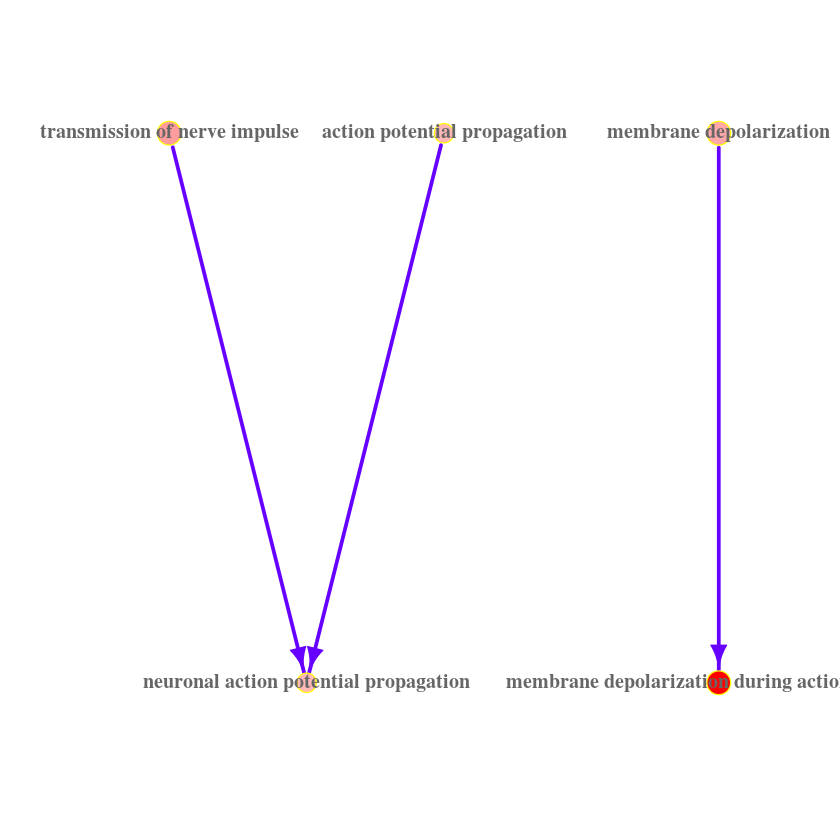

In [12]:
geneAnswersConceptRelation(queryEpilepsyForGeneAnswers, # This is the Gene Answers object we created
                           directed=TRUE,               # show arrows to indicate the direction of relationship
                           output="fixed",              # don't spawn a new pop-up window 
                           netMode='connection') 

#### Gene Interaction Network

In this example, GeneAnswers uses the annotation package ‘org.Hs.eg.db’, which was used previously in convertToGeneAnswers function, to retrieve gene interactions for the specified genes.

[1] "Building graph structure ..."
[1] "Removing NULL element ..."
[1] "Removing NA ..., including NA in names of the input list"
[1] "Converting to a matrix ..."
[1] "For the given undirected graph, the node 3 might be the root."


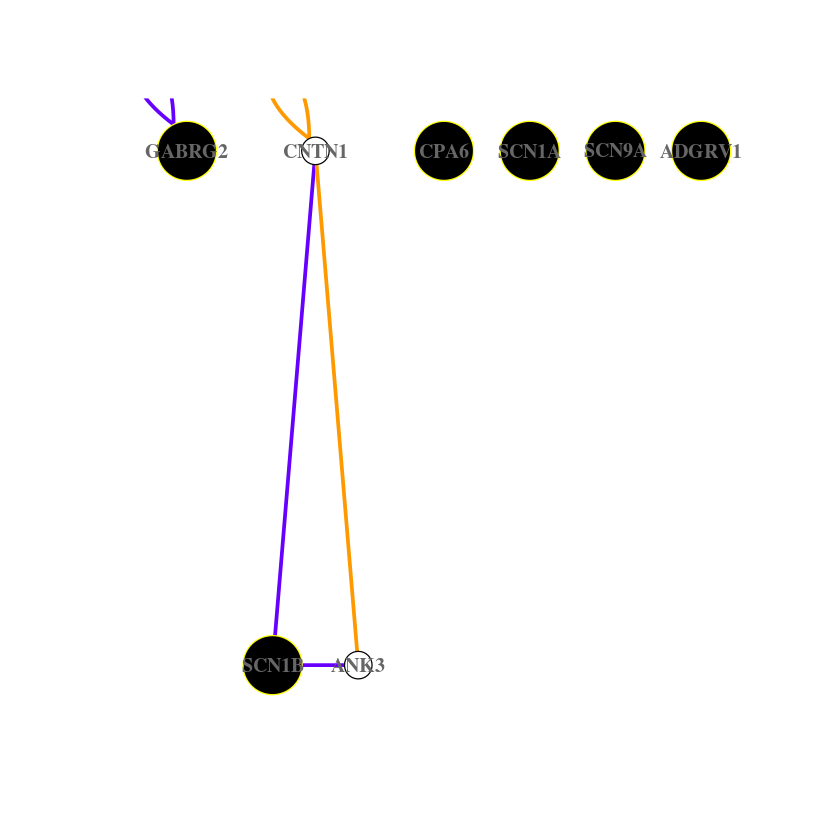

In [13]:
buildNet(getGeneInput(queryEpilepsyForGeneAnswers)[,1], # queryEpilepsyForGeneAnswers
         idType='GeneInteraction', 
         layers=3,
         output="fixed",            # don't spawn a new pop-up window 
         filterGraphIDs=getGeneInput(queryEpilepsyForGeneAnswers)[,1],
         filterLayer=2,             # How many layers deep to look for interactors. Try changing it to 3! 
         netMode='connection')

Gene Interaction Network for **PL_GenomicsEngland_GenePanel:Genetic_Epilepsy_Syndromes**.   

The large black dots with yellow frame stand for the six given genes. They also connect to other genes by dark-blue-purple edges. Small black dots represent the other genes from getGeneInput. Small white dots are genes that are not in the genes from getGeneInput, but interact with these genes. 

#### Genes vs GO Term heat map

Let's plot the genes which were enriched for GO terms in a heat map...

initial  value 0.000000 
final  value 0.000000 
converged
initial  value 0.000000 
final  value 0.000000 
converged


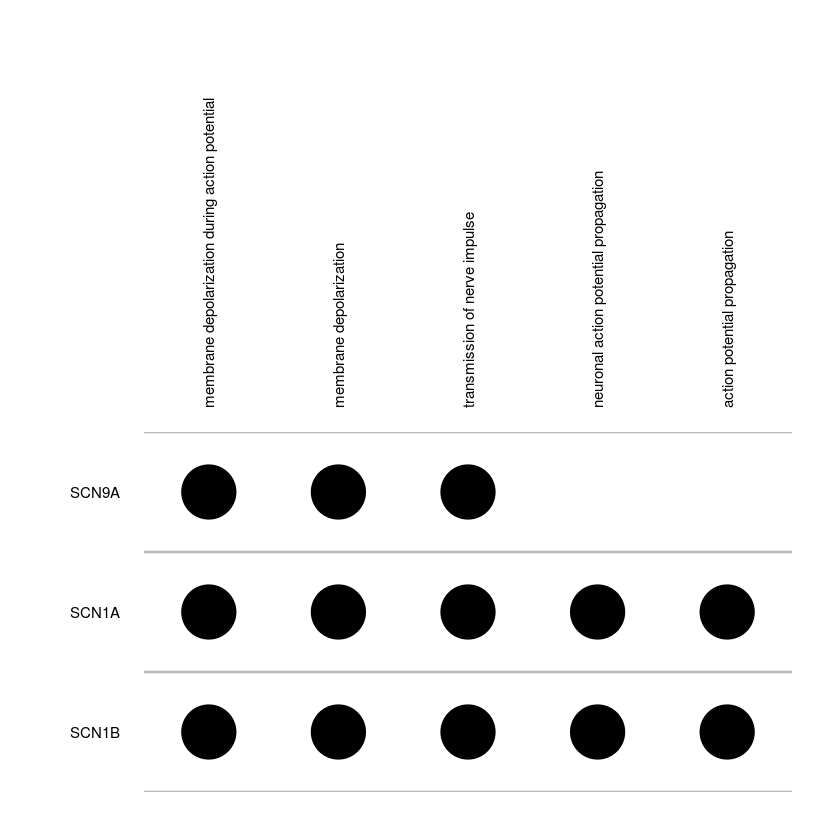

In [14]:
geneAnswersHeatmap(queryEpilepsyForGeneAnswers, 
                   catTerm=TRUE, 
                   geneSymbol=TRUE,
                   cex.axis = 0.75)